<a href="https://colab.research.google.com/github/YusukeYasui/FashionCategorize/blob/main/FashionCategorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
!cat datasets/fashion_item

cat: datasets/fashion_item: Is a directory


In [ ]:
%run prepare_images.py datasets/fashion_item

Copied images from datasets/fashion_item/tops
Copied images from datasets/fashion_item/bottoms
Copied images from datasets/fashion_item/shoes


<Figure size 432x288 with 0 Axes>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model_f'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.8.2
class number=3
['bottoms', 'shoes', 'tops']


Found 54 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
## Train Data Sample ##


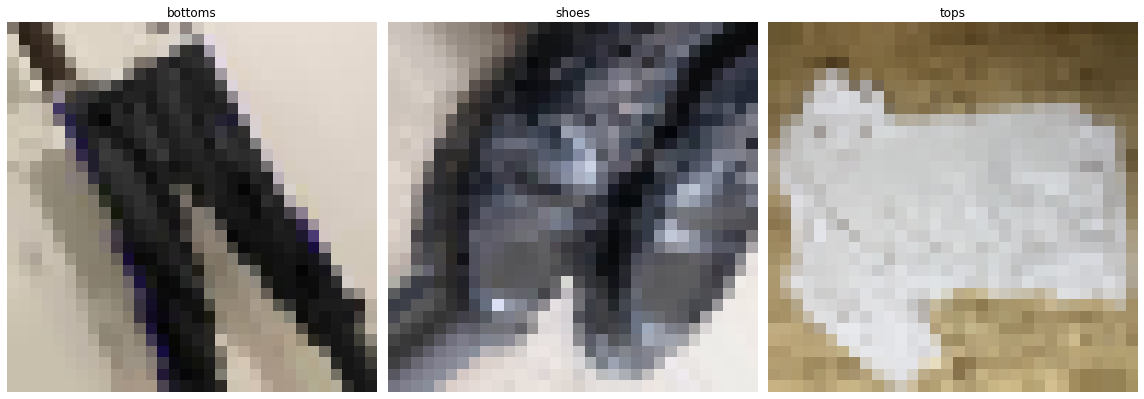

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 activation_72 (Activation)  (None, 32, 32, 8)         0         
                                                                 
 conv2d_37 (Conv2D)          (None, 30, 30, 8)         584       
                                                                 
 activation_73 (Activation)  (None, 30, 30, 8)         0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 8)        0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 15, 15, 8)         0         
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/35
7/7 [==============================] - 2s 315ms/step - loss: 1.1342 - accuracy: 0.3333 - val_loss: 1.0556 - val_accuracy: 0.5333
Epoch 2/35
7/7 [==============================] - 2s 225ms/step - loss: 1.0380 - accuracy: 0.4630 - val_loss: 1.0001 - val_accuracy: 0.5333
Epoch 3/35
7/7 [==============================] - 2s 271ms/step - loss: 1.0458 - accuracy: 0.3704 - val_loss: 0.9541 - val_accuracy: 0.4667
Epoch 4/35
7/7 [==============================] - 2s 291ms/step - loss: 1.0460 - accuracy: 0.4815 - val_loss: 0.9347 - val_accuracy: 0.7333
Epoch 5/35
7/7 [==============================] - 2s 247ms/step - loss: 0.9584 - accuracy: 0.4815 - val_loss: 0.9284 - val_accuracy: 0.4667
Epoch 6/35
7/7 [==============================] - 2s 269ms/step - loss: 0.9647 - accuracy: 0.5741 - val_loss: 0.8706 - val_accuracy: 0.7333
Epoch 7/35
7/7 [==============================] - 2s 250ms/step - loss: 0.9271 - accuracy: 0.5926 - val_loss: 0.8457 - val_accuracy: 0.7333
Epoch 8/35
7/7 [====

In [ ]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 35
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 32

train_data_gen = ImageDataGenerator(rescale=1./255)
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180)
val_data_gen = ImageDataGenerator(rescale=1./255)

# ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[0.17  0.009 0.821]
 [0.188 0.252 0.56 ]
 [0.373 0.269 0.358]
 [0.878 0.062 0.06 ]
 [0.834 0.012 0.154]
 [0.142 0.614 0.244]
 [0.006 0.795 0.2  ]
 [0.424 0.09  0.486]
 [0.038 0.936 0.026]
 [0.263 0.44  0.297]
 [0.006 0.501 0.493]
 [0.004 0.045 0.951]
 [0.571 0.306 0.123]
 [0.    0.004 0.995]
 [0.145 0.388 0.466]]
(15, 3)
#0 Expected:bottoms -> Predicted:tops
File: bottoms/images (40).jpeg
Each Prediction Value: [0.17  0.009 0.821]
**** INCORRECT ****


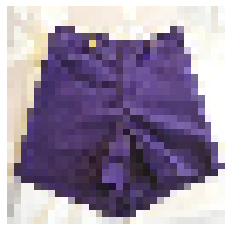

#1 Expected:bottoms -> Predicted:tops
File: bottoms/images (45).jpeg
Each Prediction Value: [0.188 0.252 0.56 ]
**** INCORRECT ****


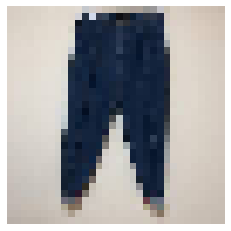

#2 Expected:bottoms -> Predicted:bottoms
File: bottoms/images (47).jpeg
Each Prediction Value: [0.373 0.269 0.358]
* Correct *
#3 Expected:bottoms -> Predicted:bottoms
File: bottoms/images (50).jpeg
Each Prediction Value: [0.878 0.062 0.06 ]
* Correct *
#4 Expected:bottoms -> Predicted:bottoms
File: bottoms/images (52).jpeg
Each Prediction Value: [0.834 0.012 0.154]
* Correct *
#5 Expected:shoes -> Predicted:shoes
File: shoes/images (11).jpeg
Each Prediction Value: [0.142 0.614 0.244]
* Correct *
#6 Expected:shoes -> Predicted:shoes
File: shoes/images (15).jpeg
Each Prediction Value: [0.006 0.795 0.2  ]
* Correct *
#7 Expected:shoes -> Predicted:tops
File: shoes/images (17).jpeg
Each Prediction Value: [0.424 0.09  0.486]
**** INCORRECT ****


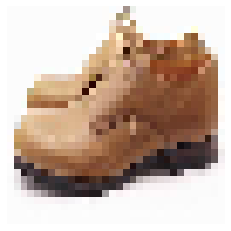

#8 Expected:shoes -> Predicted:shoes
File: shoes/images (5).jpeg
Each Prediction Value: [0.038 0.936 0.026]
* Correct *
#9 Expected:tops -> Predicted:shoes
File: tops/IMG_7026.JPG
Each Prediction Value: [0.263 0.44  0.297]
**** INCORRECT ****


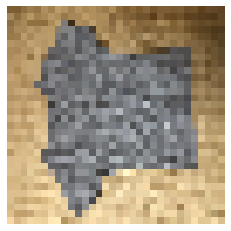

#10 Expected:tops -> Predicted:shoes
File: tops/images (21).jpeg
Each Prediction Value: [0.006 0.501 0.493]
**** INCORRECT ****


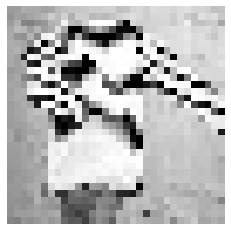

#11 Expected:tops -> Predicted:tops
File: tops/images (32).jpeg
Each Prediction Value: [0.004 0.045 0.951]
* Correct *
#12 Expected:tops -> Predicted:bottoms
File: tops/images (33).jpeg
Each Prediction Value: [0.571 0.306 0.123]
**** INCORRECT ****


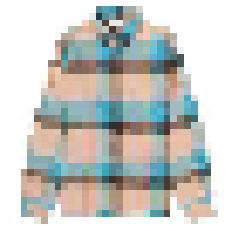

#13 Expected:tops -> Predicted:tops
File: tops/images (36).jpeg
Each Prediction Value: [0.    0.004 0.995]
* Correct *
#14 Expected:tops -> Predicted:tops
File: tops/ダウンロード (3).jpeg
Each Prediction Value: [0.145 0.388 0.466]
* Correct *
Loss


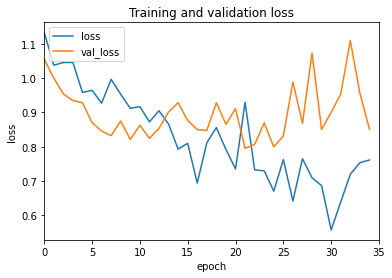

Accuracy


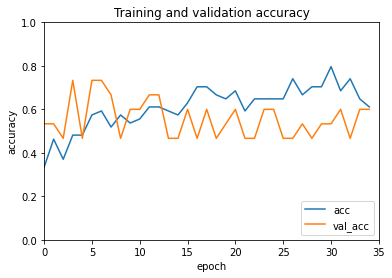

Confusion Matrix


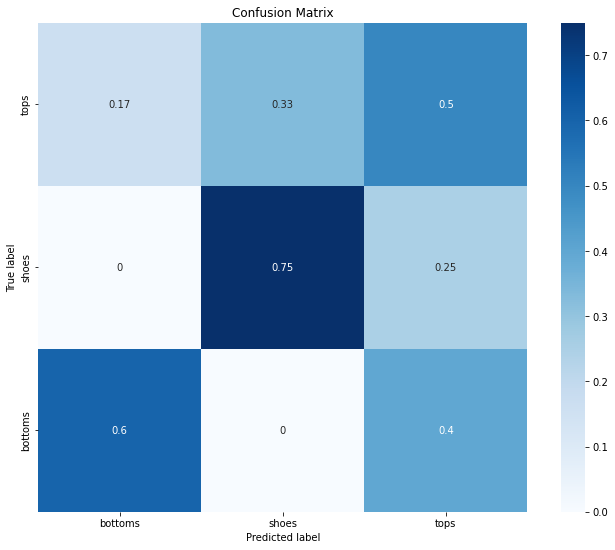

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)